In [15]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# Affichage étendu
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

In [54]:
file_path = '../data/raw/ech_annonces_locations_68.csv'
df = pd.read_csv(file_path, sep=';', parse_dates=['date'], low_memory=False)
# Afficher les 5 premières lignes du DataFrame
df.head()


,idannonce,type_annonceur,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,prix_bien,prix_maison,prix_terrain,mensualiteFinance,balcon,eau,bain,dpeL,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,annonce_exclusive,nb_etages,parking,places_parking,cave,exposition,ges_class,annee_construction,nb_toilettes,nb_terraces,videophone,porte_digicode,surface_balcon,ascenseur,nb_logements_copro,charges_copro,chauffage_energie,chauffage_systeme,chauffage_mode,categorie_annonceur,logement_neuf,duree_int,typedebien_lite,date,INSEE_COM,IRIS,CODE_IRIS,TYP_IRIS_x,TYP_IRIS_y,GRD_QUART,UU2010,REG,DEP
0,immo-facile-52417007,pr,m,l,0,116,NaN,5,1250,NaN,NaN,0,0,0,1,D,226.0,47.88299,7.19650,0,1.0,NaN,NaN,True,0,B,1987.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Électrique,Radiateur,Individuel,a,n,15.0,m,2023-04-01,68159,0,681590000,Z,Z,6815900,68000,44,68
1,ag672097-382986683,pr,a,l,3,44,NaN,3,600,NaN,NaN,0,0,1,0,D,220.0,47.75081,7.32245,0,3.0,NaN,NaN,NaN,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Électrique,NaN,Individuel,a,n,NaN,a,2023-04-01,68224,1201,682241201,H,H,6822401,68701,44,68
2,ag672097-383464082,pr,a,l,1,53,NaN,2,498,NaN,NaN,0,1,1,0,E,272.0,47.75094,7.32239,0,NaN,NaN,NaN,NaN,0,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gaz,NaN,Individuel,a,n,NaN,a,2023-04-01,68224,1201,682241201,H,H,6822401,68701,44,68
3,ag680864-383044166,pr,a,l,0,41,NaN,2,460,NaN,NaN,0,0,1,1,VI,NaN,47.75204,7.32135,0,4.0,NaN,NaN,False,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,False,NaN,NaN,Gaz,Radiateur,Collectif,a,n,NaN,a,2023-04-01,68224,1201,682241201,H,H,6822401,68701,44,68
4,ag672097-380998252,pr,a,l,2,74,NaN,4,695,NaN,NaN,0,0,0,1,D,206.0,47.75075,7.32253,0,3.0,NaN,NaN,NaN,0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gaz,NaN,Individuel,a,n,20.0,a,2023-04-01,68224,1201,682241201,H,H,6822401,68701,44,68


# Etude préliminaire

In [55]:
# Dimensions
print("\nShape:", df.shape)


Shape: (11702, 52)


Types de colonnes :
object            20
float64           16
int64             15
datetime64[ns]     1
Name: count, dtype: int64


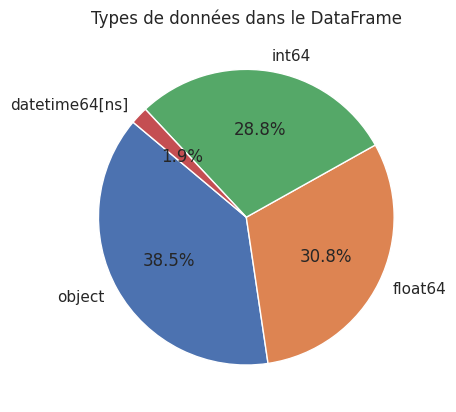

In [56]:
# Types de données
print("Types de colonnes :")
print(df.dtypes.value_counts())
plt.pie(df.dtypes.value_counts(), labels=df.dtypes.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Types de données dans le DataFrame')
plt.show()


### Noms des colonnes classés par type de données

**Colonnes de type `int64` :**
- etage: étage auquel se trouve le bien
- surface: en m²
- nb_pieces: nombre de pieces (Seules les pièces principales (salon et chambres) rentrent dans le calcul. Les pièces humides (cuisine et salle de bains) et les espaces de moins de 9 m² en sont exclus)
- prix_bien: prix en €
- mensualiteFinance: 
- balcon: booléen (1=présence d'un balcon / 0 = pas de balcon)
- eau: booléen (1 = eau courante / 0 = pas d'eau)
- bain: 
- INSEE_COM
- IRIS
- CODE_IRIS
- GRD_QUART
- UU2010
- REG
- DEP

**Colonnes de type `float64` :**
- surface_terrain
- dpeC
- mapCoordonneesLatitude
- mapCoordonneesLongitude
- nb_etages
- places_parking
- annee_construction
- nb_toilettes
- nb_terraces
- surface_balcon
- nb_logements_copro
- duree_int

**Colonnes de type `object` :**
- idannonce
- type_annonceur
- typedebien
- typedetransaction
- dpeL
- annonce_exclusive
- cave
- exposition
- ges_class
- videophone
- porte_digicode
- ascenseur
- chauffage_energie
- chauffage_systeme
- chauffage_mode
- categorie_annonceur
- logement_neuf
- typedebien_lite
- TYP_IRIS_x
- TYP_IRIS_y

**Colonne de type `datetime64[ns]` :**
- date

In [57]:
# Décompte par type (manuel)
print("\nRépartition des colonnes par type :")
type_summary = {
    "Total": df.shape[1],
    "Numériques": df.select_dtypes(include=['int64', 'float64']).shape[1],
    "Catégorielles": df.select_dtypes(include=['object']).shape[1],
    "Booléennes": df.select_dtypes(include=['bool']).shape[1],
    "Datetime": df.select_dtypes(include=['datetime64']).shape[1],
}
print(type_summary)


Répartition des colonnes par type :
{'Total': 52, 'Numériques': 31, 'Catégorielles': 20, 'Booléennes': 0, 'Datetime': 1}


Index(['dpeL', 'eau', 'bain', 'balcon', 'mensualiteFinance', 'etage',
       'prix_bien', 'surface', 'nb_pieces', 'idannonce', 'type_annonceur',
       'typedebien', 'typedetransaction', 'annonce_exclusive',
       'mapCoordonneesLongitude', 'mapCoordonneesLatitude', 'exposition',
       'categorie_annonceur', 'typedebien_lite', 'date', 'INSEE_COM', 'IRIS',
       'CODE_IRIS', 'TYP_IRIS_x', 'TYP_IRIS_y', 'GRD_QUART', 'UU2010', 'REG',
       'DEP'],
      dtype='object')

Pourcentage de valeurs nulles par colonne :


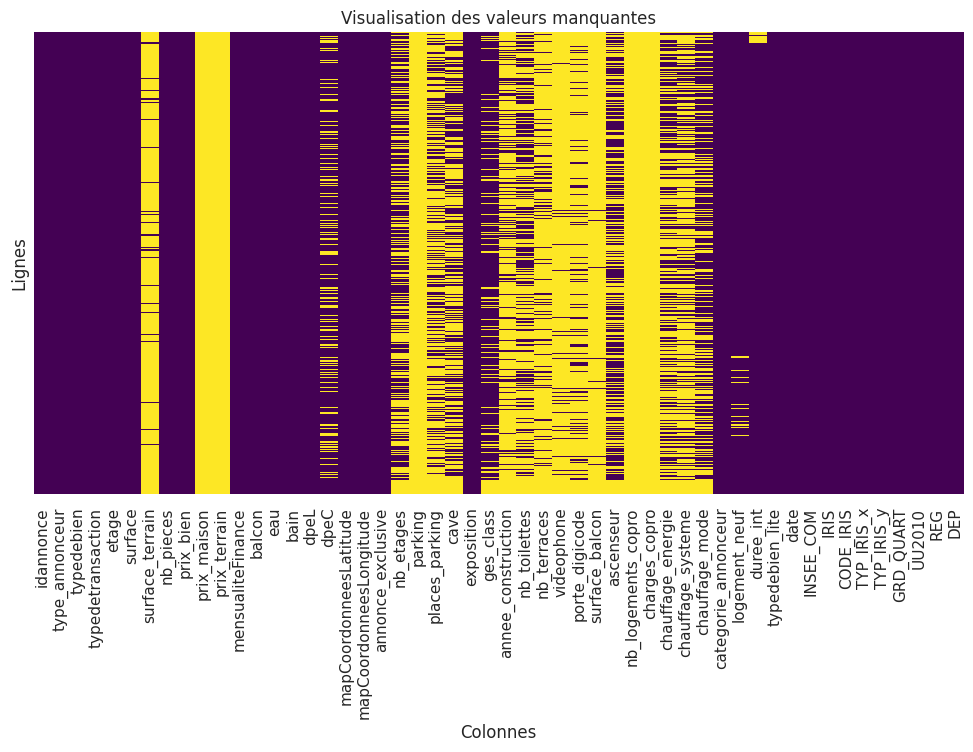

In [64]:
# 🌐 Pourcentage de valeurs manquantes
null_percent = df.isnull().mean().sort_values(ascending=False) * 100
print(null_percent[null_percent == 0].keys())

# Visualisation des valeurs manquantes
print("\nPourcentage de valeurs nulles par colonne :")
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisation des valeurs manquantes')
plt.xlabel('Colonnes')
plt.ylabel('Lignes')
plt.show()


Colonnes avec 100% de valeurs manquantes :
['prix_maison', 'prix_terrain', 'parking', 'charges_copro']

Dimensions après nettoyage : (11702, 48)

Types de données après nettoyage :
object            20
int64             15
float64           12
datetime64[ns]     1
Name: count, dtype: int64


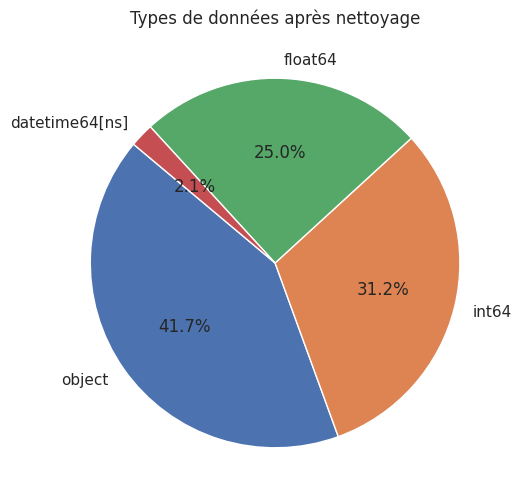

In [59]:
# Filtre des colonnes avec 100% de valeurs manquantes
missing_threshold = 1.0
missing_cols = df.columns[df.isnull().mean() >= missing_threshold]
print("\nColonnes avec 100% de valeurs manquantes :")
print(missing_cols.tolist())
# Suppression des colonnes avec 100% de valeurs manquantes
df_cleaned = df.drop(columns=missing_cols)
# Affichage des dimensions après nettoyage
print("\nDimensions après nettoyage :", df_cleaned.shape)
# Affichage des types de données après nettoyage
print("\nTypes de données après nettoyage :")
print(df_cleaned.dtypes.value_counts())
# Visualisation des types de données après nettoyage
plt.figure(figsize=(8, 6))
plt.pie(df_cleaned.dtypes.value_counts(), labels=df_cleaned.dtypes.value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Types de données après nettoyage')
plt.show()

In [53]:
# Nombre de doublons
print("Nombre de lignes dupliquées :", df_cleaned.duplicated().sum())

Nombre de lignes dupliquées : 0


In [60]:
# Colonnes constantes ou quasi constantes
low_var = [col for col in df_cleaned.columns if df_cleaned[col].nunique() <= 1]
print("Colonnes constantes ou quasi constantes:", low_var)

Colonnes constantes ou quasi constantes: ['mensualiteFinance']


In [61]:
# 🔐 Cardinalité des colonnes catégorielles
print("Top 10 colonnes par cardinalité (catégorielles):")
cat_card = df_cleaned.select_dtypes(include='object').nunique().sort_values(ascending=False)
print(cat_card.head(10))

Top 10 colonnes par cardinalité (catégorielles):
idannonce            11702
exposition              25
dpeL                    10
ges_class                9
chauffage_systeme        9
chauffage_mode           6
chauffage_energie        5
typedebien               3
typedebien_lite          3
TYP_IRIS_x               3
dtype: int64


In [62]:
# Statistiques descriptives sur les colonnes numériques
print("Statistiques descriptives (numériques) :")
display(df_cleaned.describe())

Statistiques descriptives (numériques) :


,etage,surface,surface_terrain,nb_pieces,prix_bien,mensualiteFinance,balcon,eau,bain,dpeC,mapCoordonneesLatitude,mapCoordonneesLongitude,nb_etages,places_parking,annee_construction,nb_toilettes,nb_terraces,surface_balcon,nb_logements_copro,duree_int,date,INSEE_COM,IRIS,CODE_IRIS,GRD_QUART,UU2010,REG,DEP
count,11702.000000,11702.000000,507.000000,11702.000000,11702.000000,11702.0,11702.000000,11702.000000,11702.000000,8835.000000,11702.000000,11702.000000,6631.000000,4082.000000,2275.000000,4791.000000,1565.000000,193.000000,9.000000,11448.000000,11702,11702.000000,11702.000000,1.170200e+04,1.170200e+04,11702.000000,11702.000000,11702.000000
mean,1.840711,65.150060,564.100118,2.820629,714.543924,0.0,0.186977,0.286789,0.553837,195.815998,47.787841,7.358137,3.158649,5.585007,1973.494945,1.130035,0.530351,8.393782,18.666667,-207.466632,2021-07-22 07:04:17.802085376,68191.909844,244.231499,6.819193e+08,6.819192e+06,68324.462400,44.018886,67.999316
min,-2.000000,7.000000,1.710000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,43.695670,0.077180,0.000000,0.000000,1001.000000,0.000000,0.000000,1.000000,0.000000,-1125.000000,2019-04-01 00:00:00,6088.000000,0.000000,6.088010e+07,6.088010e+05,758.000000,11.000000,6.000000
25%,0.000000,45.000000,200.000000,2.000000,531.000000,0.0,0.000000,0.000000,0.000000,125.000000,47.637520,7.318720,2.000000,1.000000,1949.000000,1.000000,0.000000,5.000000,3.000000,-757.000000,2020-09-01 00:00:00,68093.000000,0.000000,6.809300e+08,6.809300e+06,68402.000000,44.000000,68.000000
50%,1.000000,62.000000,455.000000,3.000000,660.000000,0.0,0.000000,0.000000,1.000000,188.000000,47.750100,7.345930,3.000000,1.000000,1985.000000,1.000000,1.000000,8.000000,5.000000,15.000000,2021-08-01 00:00:00,68224.000000,103.000000,6.822402e+08,6.822401e+06,68501.000000,44.000000,68.000000
75%,2.000000,79.000000,700.000000,3.000000,820.000000,0.0,0.000000,1.000000,1.000000,255.000000,47.887640,7.440727,4.000000,2.000000,2009.000000,1.000000,1.000000,10.000000,8.000000,41.000000,2022-07-01 00:00:00,68271.000000,202.000000,6.827101e+08,6.827101e+06,68701.000000,44.000000,68.000000
max,999.000000,450.000000,10198.000000,13.000000,3287.000000,0.0,12.000000,3.000000,127.000000,939.000000,49.361760,7.589750,169.000000,216.000000,2023.000000,14.000000,3.000000,31.000000,131.000000,504.000000,2023-04-01 00:00:00,86214.000000,6220.000000,8.621401e+08,8.621401e+06,86601.000000,93.000000,86.000000
std,24.546138,30.798055,776.823114,1.219675,286.924335,0.0,0.459904,0.465137,1.283623,103.608167,0.196353,0.231761,3.037997,29.688586,54.675483,0.448609,0.558478,4.570098,42.272923,422.747918,NaN,814.069476,385.032725,8.140732e+06,8.140730e+04,3166.426849,1.763585,0.807832


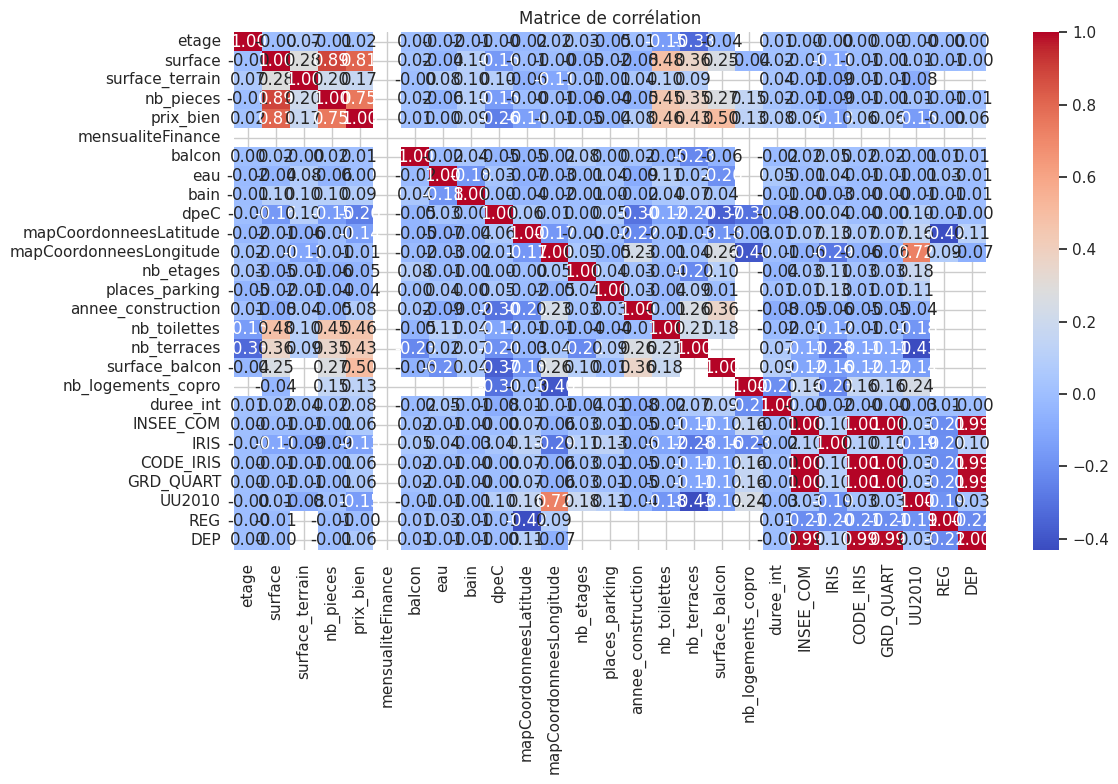

In [63]:
# Corrélation entre variables numériques
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()